Epoch 1000/10000, Loss: 0.0423
Epoch 2000/10000, Loss: 0.0296
Epoch 3000/10000, Loss: 0.0247
Epoch 4000/10000, Loss: 0.0219
Epoch 5000/10000, Loss: 0.0199
Epoch 6000/10000, Loss: 0.0184
Epoch 7000/10000, Loss: 0.0172
Epoch 8000/10000, Loss: 0.0162
Epoch 9000/10000, Loss: 0.0154
Epoch 10000/10000, Loss: 0.0147
Accuracy: 1.0000


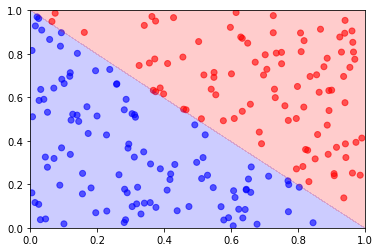

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a toy dataset
np.random.seed(42)
X = np.random.rand(200, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int).reshape(-1, 1)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        m = y.shape[0]
        error = output - y
        d_output = error * self.sigmoid_derivative(output)
        
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * self.sigmoid_derivative(self.a1)
        
        self.W2 -= np.dot(self.a1.T, d_output) / m
        self.b2 -= np.sum(d_output, axis=0, keepdims=True) / m
        self.W1 -= np.dot(X.T, d_hidden) / m
        self.b1 -= np.sum(d_hidden, axis=0, keepdims=True) / m
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if (epoch + 1) % 1000 == 0:
                loss = np.mean((y - output) ** 2)
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

# Hyperparameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 10000

# Initialize and train the neural network
nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, y, epochs, learning_rate)

# Evaluate the neural network
predictions = nn.forward(X) > 0.5
accuracy = np.mean(predictions == y)
print(f'Accuracy: {accuracy:.4f}')

# Plot the dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', alpha=0.6)
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.show()
